<a href="https://colab.research.google.com/github/Priyakarna13/Bitcoin-price-prediction/blob/main/Bitcoin_RandomForest_and_boosting_ensembleipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate,cross_val_score,cross_val_predict
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from math import sqrt
rcParams['figure.figsize'] = 15, 6

In [ ]:
df=pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.isnull().values.any()
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
107048,1331740800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107049,1331740860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107050,1331740920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107051,1331740980,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
df['Price'] = (df['High']+ df['Low'])/2
group = df.groupby('Date')
Daily_Price = group['Price'].mean()
Daily_Price.head()

Date
2011-12-31    4.473750
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.211667
Name: Price, dtype: float64

In [ ]:
new_df= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["Price"])

In [ ]:

new_df.head()

,Price
Date,
2011-12-31,4.473750
2012-01-01,4.806667
2012-01-02,5.000000
2012-01-03,5.252500
2012-01-04,5.211667


(array([734503., 734517., 734534., 734548., 734563., 734577.]),
 <a list of 6 Text major ticklabel objects>)

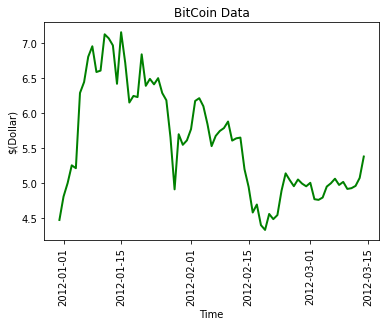

In [ ]:
plt.plot(new_df,color='green', lw=2)
plt.title("BitCoin Data")
plt.xlabel('Time')
plt.ylabel('$(Dollar)')
plt.xticks(rotation='vertical')

In [ ]:
df=new_df
forecast_out = int(20)
df['Prediction'] = df[['Price']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))
cross_validation = forest_reg.predict(X_test)
score = forest_reg.score(X_test, y_test)
print("Score: ", score)
forecast_prediction = forest_reg.predict(X_forecast)
print(forecast_prediction)

Random Forest R squared": 0.1431
Score:  0.14309252118947402
[5.90267553 5.09348737 5.07806632 5.09348737 5.09241237 5.07806632
 5.09241237 5.94404904 5.94404904 6.00884904 5.07806632 5.09241237
 5.09348737 5.07806632 5.09241237 5.07806632 5.07806632 5.07806632
 5.32000053 5.8366771 ]


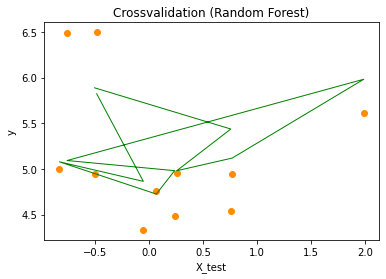

In [ ]:
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_test, cross_validation, color='green', linewidth=1,label='predicted')
plt.title("Crossvalidation (Random Forest)")
plt.xlabel('X_test')
plt.ylabel('y')
#plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(y_test, cross_validation))
print(rms)

0.6591943835521253


In [ ]:

last_date = new_df.iloc[-1].name
print(last_date)

2012-03-14


In [ ]:
date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(19), freq='D')
print(len(days),len(forecast_prediction))
# np.random.seed(seed=1111)
# data = np.random.randint(1, high=100, size=len(days))
df1 = pd.DataFrame({'Date': days, 'Price': forecast_prediction})
df1 =df1.set_index('Date')
df1.info()
print(df.head())

20 20
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2012-03-14 to 2012-04-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes
               Price  Prediction
Date                            
2011-12-31  4.473750    6.835000
2012-01-01  4.806667    6.386000
2012-01-02  5.000000    6.485000
2012-01-03  5.252500    6.407500
2012-01-04  5.211667    6.495556


(array([734577., 734579., 734581., 734583., 734585., 734587., 734589.,
        734591., 734593., 734594.]),
 <a list of 10 Text major ticklabel objects>)

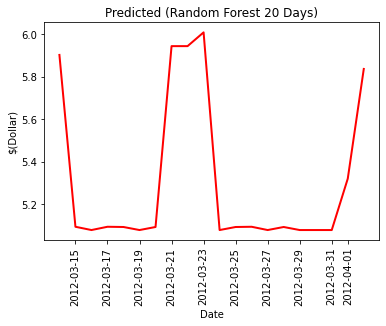

In [ ]:
plt.plot(df1,color='red', lw=2)
plt.title("Predicted (Random Forest 20 Days)")
plt.xlabel('Date')
plt.ylabel('$(Dollar)')
plt.xticks(rotation='vertical')

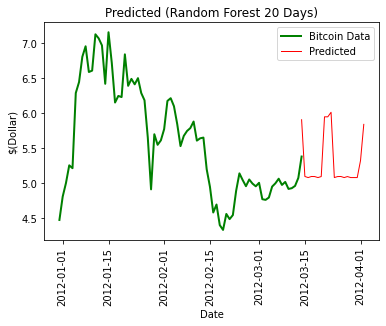

In [ ]:
plt.plot(df['Price'],label='Bitcoin Data',color='green', lw=2)
plt.plot(df1['Price'],label='Predicted',color='red', lw=1)
plt.title("Predicted (Random Forest 20 Days)")
plt.xlabel('Date')
plt.ylabel('$(Dollar)')
plt.xticks(rotation='vertical')
plt.legend(loc='best')

In [ ]:
df2=new_df
forecast_out1 = int(20)

df2['Prediction'] = df2[['Price']].shift(-forecast_out1)

X = np.array(df2.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df2['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)


cross_validation = model.predict(X_test)

score = model.score(X_test, y_test)
print("Score: ", score)

forecast_prediction = model.predict(X_forecast)
print(forecast_prediction)

Score:  -0.14514489154637333
[6.29599    4.78188912 4.78188912 4.78188912 4.78188912 4.78188912
 4.78188912 6.28041207 6.28041207 6.28041207 4.78188912 4.78188912
 4.78188912 4.78188912 4.78188912 4.78188912 4.78188912 4.78188912
 4.78188912 6.29599   ]


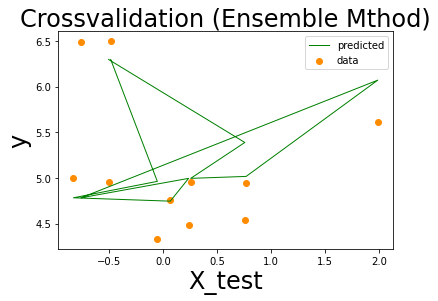

In [ ]:
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_test, cross_validation, color='green', linewidth=1,label='predicted')
plt.title("Crossvalidation (Ensemble Mthod)",fontsize=24)
plt.xlabel('X_test',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(y_test, cross_validation))
print(rms)

0.7620382163935924


In [ ]:
last_date = new_df.iloc[-1].name
print(last_date)

2012-03-14


In [ ]:
date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(19), freq='D')
print(len(days),len(forecast_prediction))
df3 = pd.DataFrame({'Date': days, 'Price': forecast_prediction})
df3 =df3.set_index('Date')
df3.info()
print(df3.head())

20 20
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2012-03-14 to 2012-04-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes
               Price
Date                
2012-03-14  6.295990
2012-03-15  4.781889
2012-03-16  4.781889
2012-03-17  4.781889
2012-03-18  4.781889


Text(0, 0.5, '$(Dollar)')

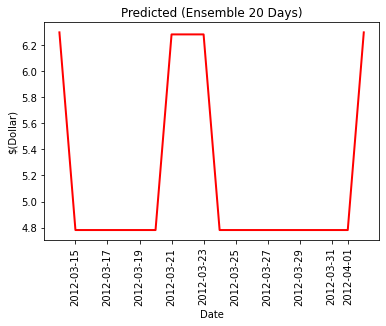

In [ ]:
plt.plot(df3,color='red', lw=2)
plt.title("Predicted (Ensemble 20 Days)")
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('$(Dollar)')


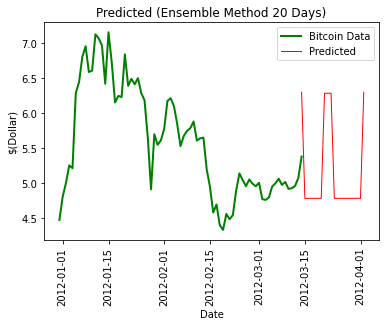

In [ ]:
plt.plot(df['Price'],label='Bitcoin Data',color='green', lw=2)
plt.plot(df3['Price'],label='Predicted',color='red', lw=1)
plt.title("Predicted (Ensemble Method 20 Days)")
plt.xlabel('Date')
plt.ylabel('$(Dollar)')
plt.xticks(rotation='vertical')
plt.legend(loc='best')